# Analysis 2 :

# Finding the most troubled region by terrorists in the world,percentage of people killed and wounded in each region and taking the top attacked countries from two regions and plotting the graph with attack type, Top 15 dangerous places.

In [31]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.patches as mpat
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import warnings
warnings.filterwarnings('ignore')
try:
    t_file = pd.read_csv('final/data/raw_data/globalterrorismdb_0616dist.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

Global_terror = t_file.copy()
Global_terror = Global_terror.rename(columns={'iyear':'year','attacktype1_txt':'attacktype','country_txt':'country_name','region_txt':'region_name'})
Global_terror = Global_terror[['year','country_name','region_name','attacktype','nkill','nwound']]
Global_terror['count'] = 1 

File load: Success


Finding the most troubled region by terrorists in the world

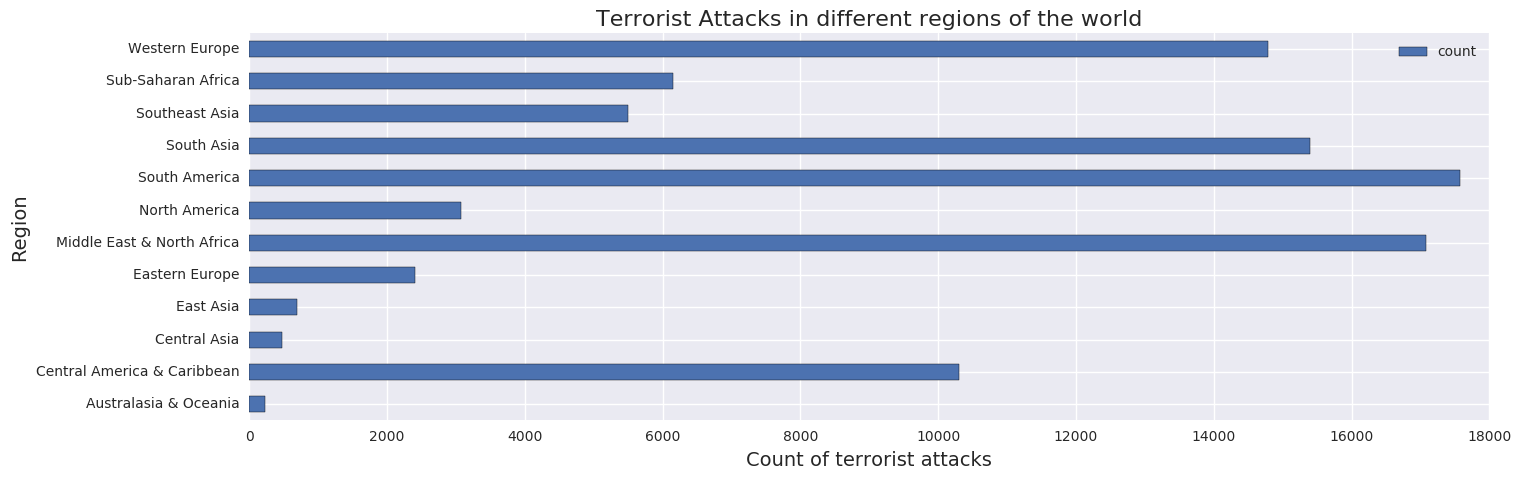

In [22]:
# Region
region_cases = Global_terror.groupby('region_name').agg({'count':'sum'})
region_cases.plot(kind='barh',figsize=[16,5])
plt.xlabel('Count of terrorist attacks', size=14)
plt.ylabel('Region', size=14)
plt.title('Terrorist Attacks in different regions of the world', size=16)

Most troubled region: 1. South America
                      2. Middle East & North Africa

Finding the kills and wounds of each region

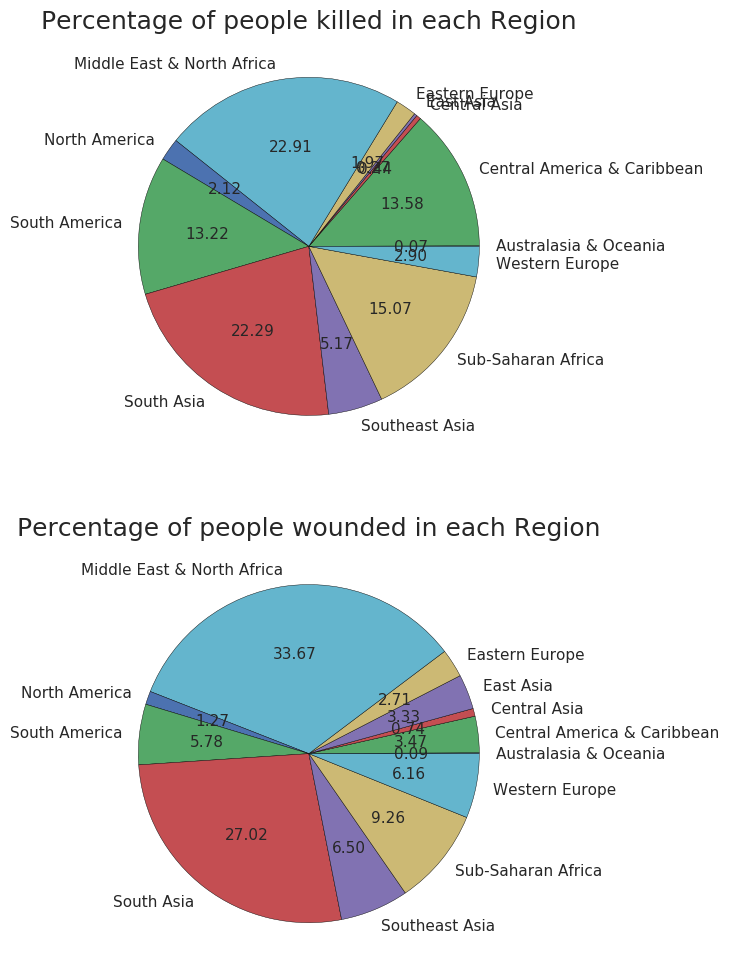

In [23]:
#kills and wounds in each region
x = Global_terror.groupby('region_name')['nkill'].sum()
y = Global_terror.groupby('region_name')['nwound'].sum()

plt.figure(figsize=[5.5,12])
plt.subplot(211)
x.plot.pie(subplots=True, autopct = '%.2f', figsize=[6,6], fontsize=11)
plt.ylabel("")
plt.title("Percentage of people killed in each Region", size=18)

plt.subplot(212)
y.plot.pie(subplots=True, autopct = '%.2f', figsize=[6,6], fontsize=11)
plt.ylabel("")
plt.title("Percentage of people wounded in each Region", size=18)

Middle East & N.Africa --> 30.55% people killed and 41.26% wounded from the total people killed/wounded by terrorist attacks. South Asia --> 24.52% killed and 27.78 wounded.

Lets go deeper into these 2 regions:

Taking the top attacked countries from two regions for analysis and plotting the graph with attack type

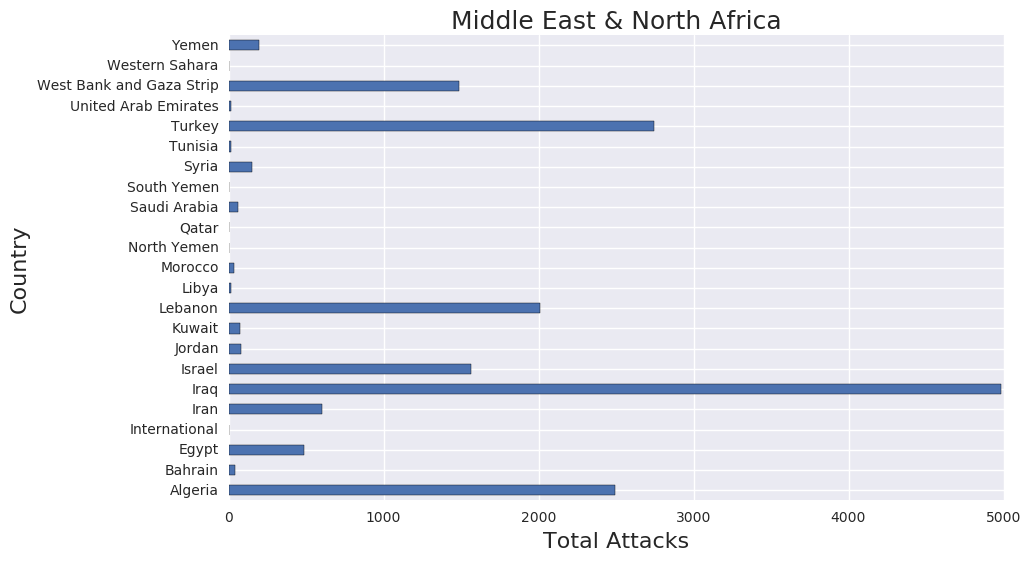

In [24]:
mideast = Global_terror[Global_terror.region_name == 'Middle East & North Africa'].groupby('country_name')['count'].sum()
Sasia = Global_terror[Global_terror.region_name == 'South Asia'].groupby('country_name')['count'].sum()

# Middle East & North Africa
mideast.plot(kind='barh', figsize=[10,6])
plt.title('Middle East & North Africa', size=18)
plt.xlabel('Total Attacks', size=16)
plt.ylabel('Country', size=16)

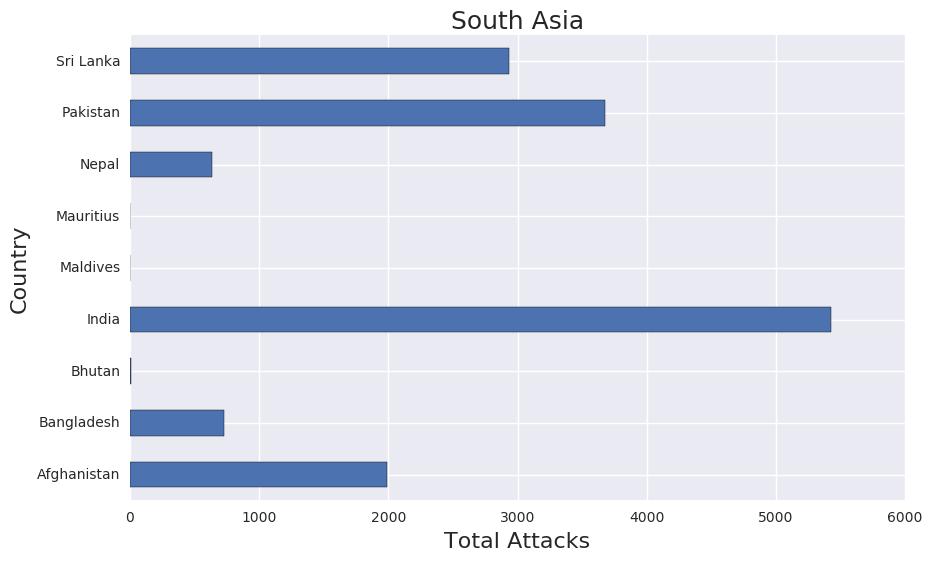

In [25]:
# South Asia
Sasia.plot(kind='barh', figsize=[10,6])
plt.title('South Asia', size=18)
plt.xlabel('Total Attacks', size=16)
plt.ylabel('Country', size=16)

Iraq from Middle East and India from South Asia have the highest number of terrorist attacks.

In [26]:
def attack_year(df,col_name):
    new_df = df.rename(columns={'count':'total_attacks'})
    total = new_df['total_attacks'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['total_attacks']/total)*100, axis=1)
    return new_df

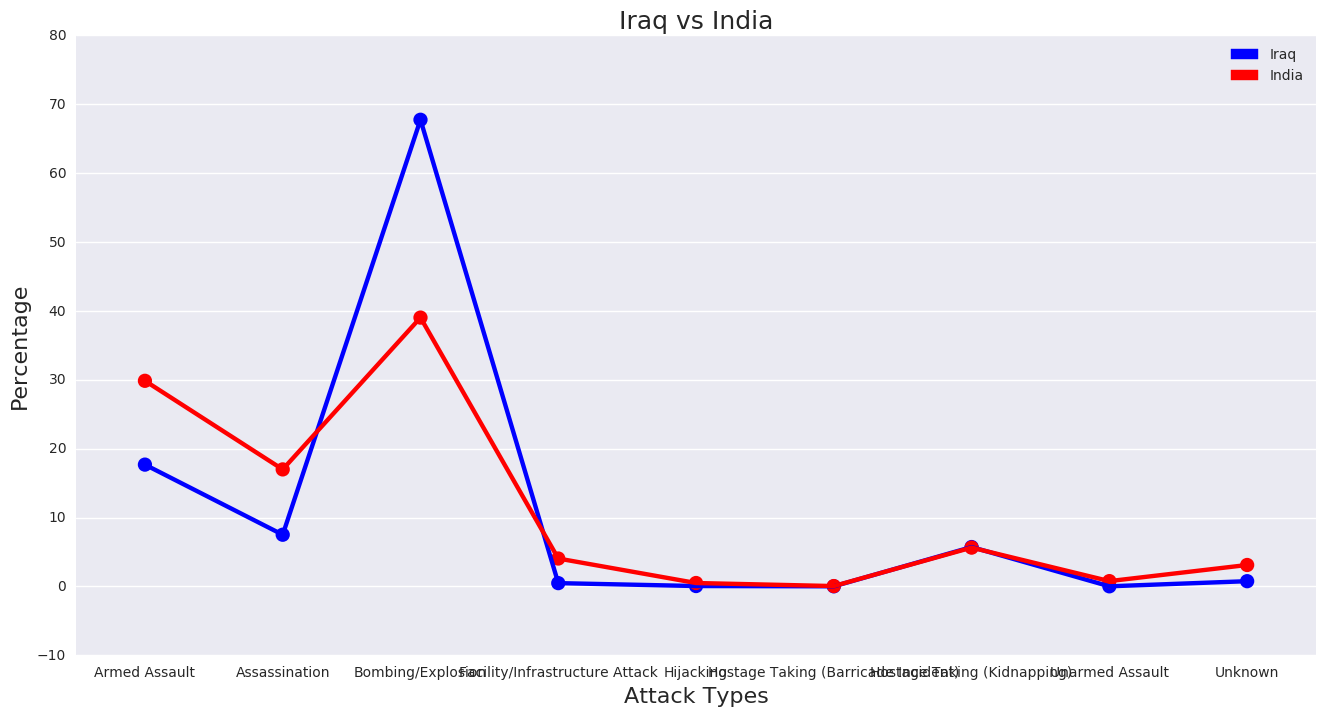

In [30]:
# Iraq vs India
iraq_df = Global_terror[Global_terror.country_name == 'Iraq'].groupby('attacktype')['count'].sum().reset_index()
pak_df = Global_terror[Global_terror.country_name == 'India'].groupby('attacktype')['count'].sum().reset_index()

new_iraq = attack_year(iraq_df,'attacktype')
new_pak = attack_year(pak_df,'attacktype')

plt.figure(figsize=[16,8])
sns.pointplot(x='attacktype', y='Percentage', data=new_iraq, color='blue')
sns.pointplot(x='attacktype', y='Percentage', data=new_pak, color='red')
plt.title('Iraq vs India', size=18)
plt.xlabel('Attack Types', size=16)
plt.ylabel('Percentage', size=16)

blue_l = mpat.Patch(color='blue', label='Iraq')
red_l = mpat.Patch(color='red', label='India')
plt.legend(handles=[blue_l,red_l])

Finding the Top 15 dangerous places by terrorism.

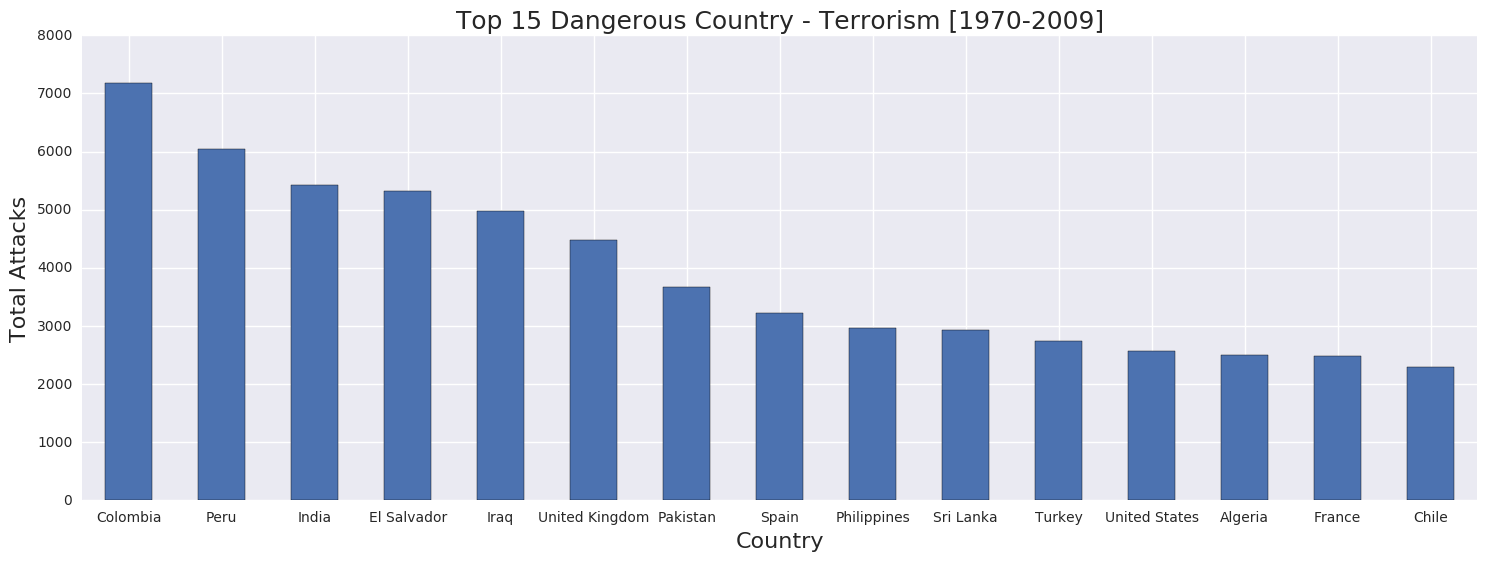

In [29]:
# top 15 dangerous place - w.r.t terrorism [1970 to 2015]

top15_dan = Global_terror.groupby('country_name')['count'].count().sort_values(ascending=False)
plt.figure(figsize=[18,6])
top15_dan.head(15).plot(kind='bar', rot=0)
plt.xlabel('Country', size=16)
plt.ylabel('Total Attacks', size=16)
plt.title('Top 15 Dangerous Country - Terrorism [1970-2009]', size=18)